In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV directly from the URL
url = "https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/vaccination/aefi.csv"
data = pd.read_csv(url)

# Convert the 'date' column to datetime, allowing mixed formats
data['date'] = pd.to_datetime(data['date'], dayfirst=True, errors='coerce')

# Define the date range
start_date = '2021-04-01'
end_date = '2021-10-01'

# Filter the data within the specified date range
data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

# Keep only the required columns
columns_to_keep = [
    'vaxtype', 'daily_total', 'daily_serious_npra', 'daily_nonserious_npra', 
    'd1_site_pain', 'd2_site_pain', 'd1_headache', 'd2_headache', 'd1_fever', 'd2_fever'
]

data = data[columns_to_keep]

# Display the filtered data
print(data.head(5))
print(data)


    vaxtype  daily_total  daily_serious_npra  daily_nonserious_npra  \
38   pfizer         2051                   6                    253   
39  sinovac            1                   0                      1   
40   pfizer         1049                   7                    124   
41  sinovac            1                   0                      1   
42   pfizer          592                   4                     11   

    d1_site_pain  d2_site_pain  d1_headache  d2_headache  d1_fever  d2_fever  
38          1046           168          550          137       137        80  
39             0             0            0            0         0         0  
40           584            51          307           35        93        10  
41             0             0            0            0         0         0  
42           349            33          185           28        57        10  
         vaxtype  daily_total  daily_serious_npra  daily_nonserious_npra  \
38        pfizer       

C:\Users\cheng\AppData\Local\Temp\ipykernel_8088\41974748.py:11: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date'], dayfirst=True, errors='coerce')


In [88]:
###EDA part

In [99]:
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))
# check for any categorical variables

Categorical variables: 1


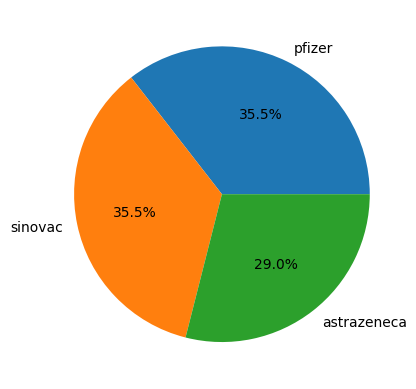

In [100]:
# Examine Default

temp = data['vaxtype'].value_counts() 
plt.pie(temp.values, 
        labels=temp.index, 
        autopct='%1.1f%%') 
plt.show() 

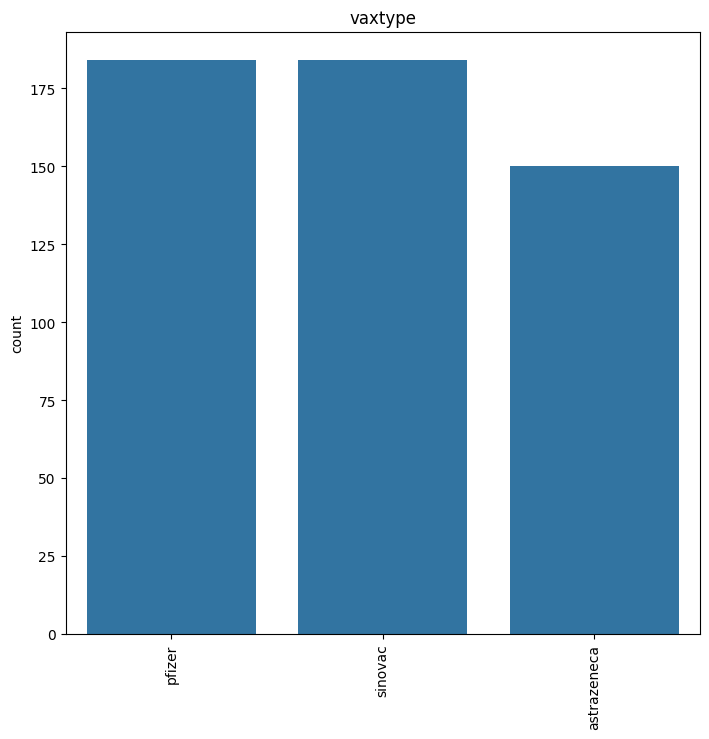

In [101]:
obj = (data.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1
  
for col in object_cols: 
  y = data[col].value_counts() 
  plt.subplot(4,2,index) 
  plt.xticks(rotation=90) 
  sns.barplot(x=list(y.index), y=y) 
  plt.title(col)
  index +=1

In [102]:
# One-hot encode the 'vaxtype' column
vaxtype_mapping = {'pfizer': 0, 'sinovac': 1, 'astrazeneca': 2, 'sinopharm': 3}
data['vaxtype'] = data['vaxtype'].map(vaxtype_mapping)


In [104]:
# Display the filtered data with encoded vaxtype
print(data.head())

    vaxtype  daily_total  daily_serious_npra  daily_nonserious_npra  \
38        0         2051                   6                    253   
39        1            1                   0                      1   
40        0         1049                   7                    124   
41        1            1                   0                      1   
42        0          592                   4                     11   

    d1_site_pain  d2_site_pain  d1_headache  d2_headache  d1_fever  d2_fever  
38          1046           168          550          137       137        80  
39             0             0            0            0         0         0  
40           584            51          307           35        93        10  
41             0             0            0            0         0         0  
42           349            33          185           28        57        10  


In [105]:
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))
# check for any categorical variables

Categorical variables: 0


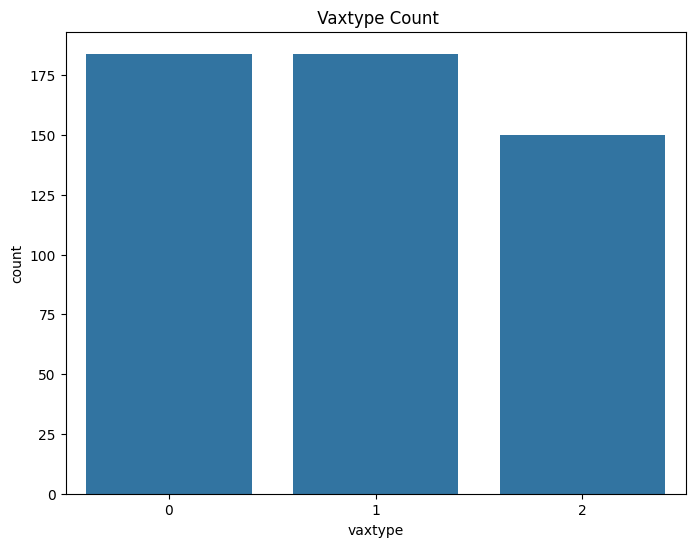

In [106]:
# Plot to verify the encoding
plt.figure(figsize=(8,6))
sns.countplot(x='vaxtype', data=data)
plt.title(' Vaxtype Count')
plt.show()

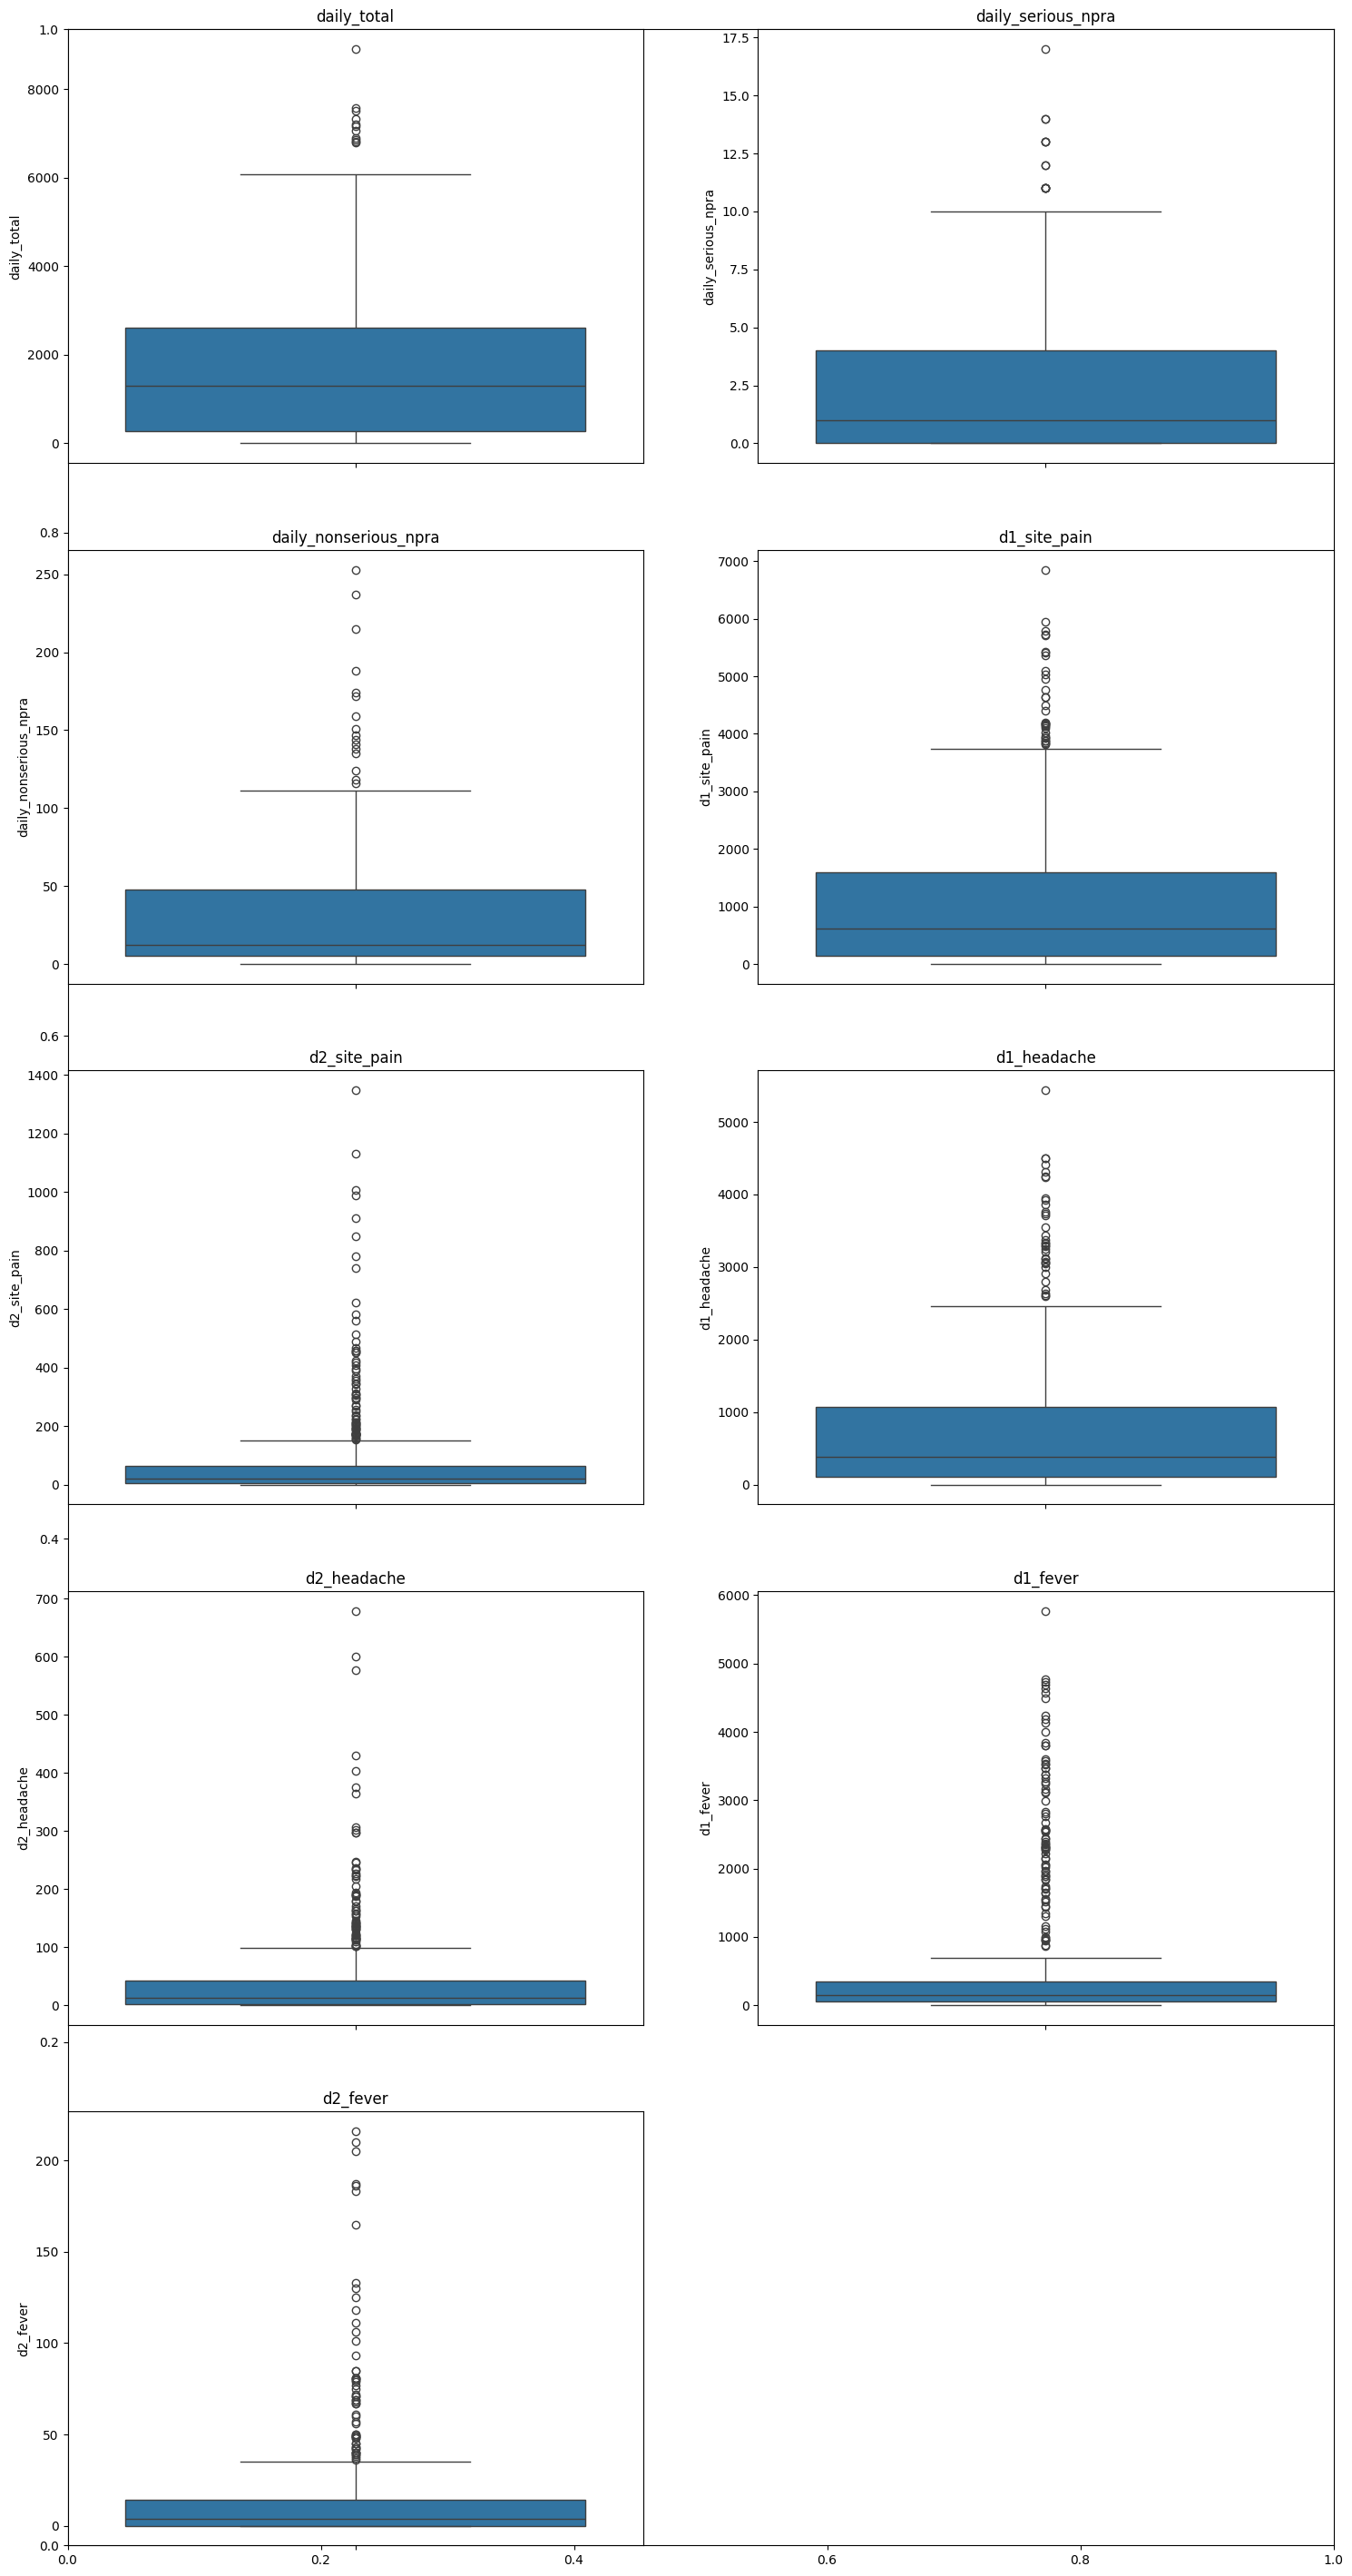

In [107]:
plt.subplots(figsize=(18, 36)) 
for i, col in enumerate(['daily_total', 'daily_serious_npra', 'daily_nonserious_npra', 
    'd1_site_pain', 'd2_site_pain', 'd1_headache', 'd2_headache', 'd1_fever', 'd2_fever']): 
    plt.subplot(5, 2, i+1) 
    sns.boxplot(data[col]) .set_title(col)
plt.show() 

<Axes: >

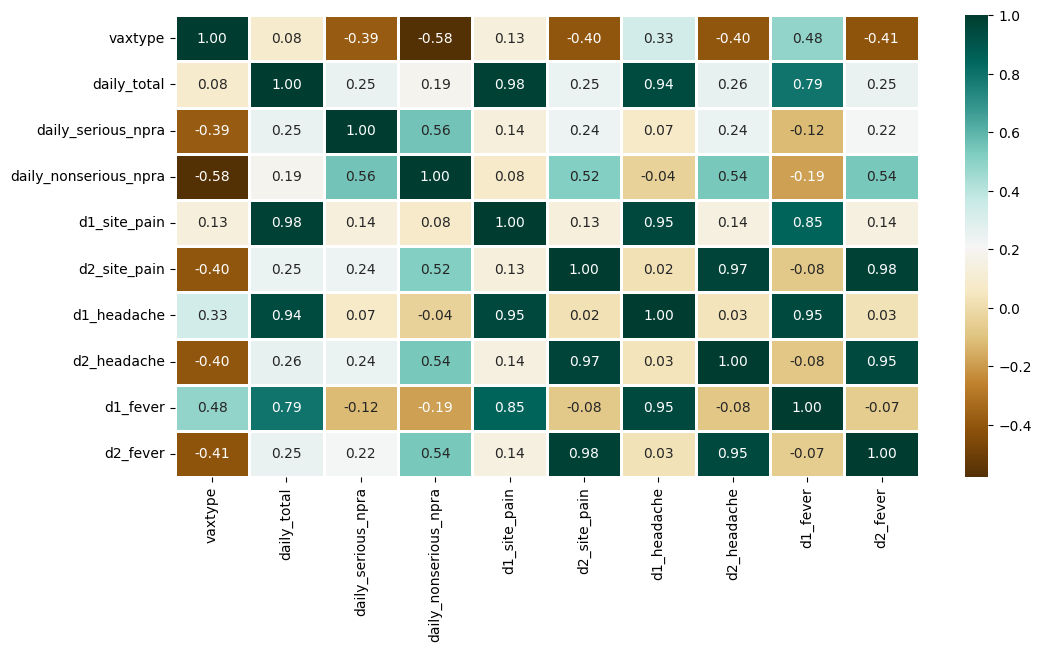

In [108]:
plt.figure(figsize=(12,6)) 
  
sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f', 
            linewidths=2,annot=True)

In [109]:
# Check If there's any missing value
data.isna().sum()

vaxtype                  0
daily_total              0
daily_serious_npra       0
daily_nonserious_npra    0
d1_site_pain             0
d2_site_pain             0
d1_headache              0
d2_headache              0
d1_fever                 0
d2_fever                 0
dtype: int64

In [110]:
# Check if there's any duplicated data
data.duplicated().any()

np.True_